In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from xgboost import plot_tree, plot_importance
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler , OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer , QuantileTransformer, Normalizer
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score, roc_curve, mean_squared_error, auc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('Train_Data.csv')

In [5]:
df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [6]:
df.shape

(4571, 9)

In [7]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [8]:
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

In [9]:
df1 = df.copy()

In [10]:
df1.adgroup.value_counts()

adgroup 3    1672
adgroup 1    1314
adgroup 4     858
adgroup 2     727
Name: adgroup, dtype: int64

In [11]:
for col in df1.columns:
    print(df1[col].value_counts())

30-10-2020    35
29-10-2020    34
22-12-2020    34
24-12-2020    33
25-12-2020    32
              ..
13-09-2020    10
30-09-2020    10
29-09-2020     8
28-08-2020     8
31-08-2020     8
Name: date, Length: 212, dtype: int64
campaign 1    4571
Name: campaign, dtype: int64
adgroup 3    1672
adgroup 1    1314
adgroup 4     858
adgroup 2     727
Name: adgroup, dtype: int64
ad 3     617
ad 1     587
ad 2     512
ad 7     461
ad 32    377
        ... 
ad 36      4
ad 24      4
ad 31      4
ad 39      4
ad 51      3
Name: ad, Length: 70, dtype: int64
1       390
2       258
3       198
5       157
6       150
       ... 
310       1
328       1
298       1
290       1
2023      1
Name: impressions, Length: 571, dtype: int64
1       464
0       444
2       351
4       252
3       246
       ... 
114       1
158       1
178       1
186       1
1771      1
Name: clicks, Length: 355, dtype: int64
0.00      444
0.01      262
0.02      193
0.03      142
0.04      131
         ... 
14.48       1
26

In [13]:
df1.nunique()

date            212
campaign          1
adgroup           4
ad               70
impressions     571
clicks          355
cost            810
conversions      49
revenue        1223
dtype: int64

In [12]:
df1.drop('campaign',axis = 1, inplace = True)

In [13]:
df1.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,adgroup 1,ad 2,247,126,1.29,4,925.71


In [14]:
df1.dtypes

date            object
adgroup         object
ad              object
impressions      int64
clicks           int64
cost           float64
conversions      int64
revenue        float64
dtype: object

Let's consider when to apply OHE and when to apply Label Encoding while building tree based models.

We apply OHE when:

When the values that are close to each other in the label encoding correspond to target values that aren't close (non - linear data).
When the categorical feature is not ordinal (dog,cat,mouse).

We apply Label encoding when:

The categorical feature is ordinal (Jr. kg, Sr. kg, Primary school, high school ,etc).
When we can come up with a label encoder that assigns close labels to similar categories:\
This leads to less splits in the tress hence reducing the execution time.\
When the number of categorical features in the dataset is huge: One-hot encoding a categorical feature with huge number of values can lead to 

(1) high memory consumption and\
(2) the case when non-categorical features are rarely used by model. You can deal with the 1st case if you employ sparse matrices. The 2nd case can occur if you build a tree using only a subset of features. For example, if you have 9 numeric features and 1 categorical with 100 unique values and you one-hot-encoded that categorical feature, you will get 109 features. If a tree is built with only a subset of features, initial 9 numeric features will rarely be used. In this case, you can increase the parameter controlling size of this subset. In xgboost it is called colsample_bytree, in sklearn's Random Forest max_features.
In case you want to continue with OHE, as @AN6U5 suggested, you might want to combine PCA with OHE.

Lets consider when to apply OHE and Label Encoding while building non tree based models.

To apply Label encoding, the dependance between feature and target must be linear in order for Label Encoding to be utilised effectively.

Similarly, in case the dependance is non-linear, you might want to use OHE for the same.

In [15]:
dfe = df1.select_dtypes(exclude=['object'])

In [16]:
dfe.head()

,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71


<AxesSubplot:>

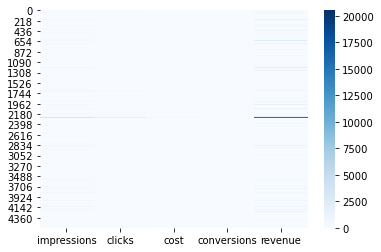

In [17]:
sns.heatmap(dfe, cmap = 'Blues')

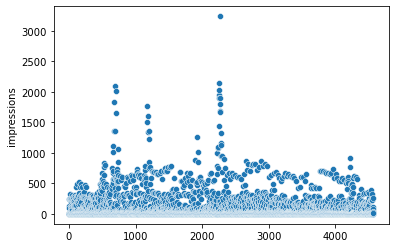

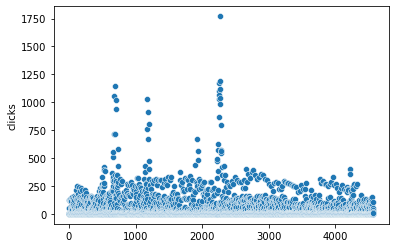

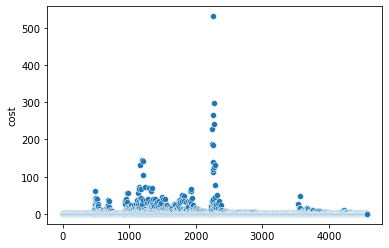

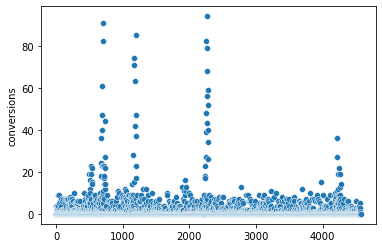

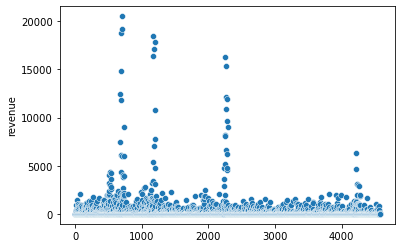

In [18]:
for col in dfe.columns:
    sns.scatterplot(data = dfe[col])
    plt.show()

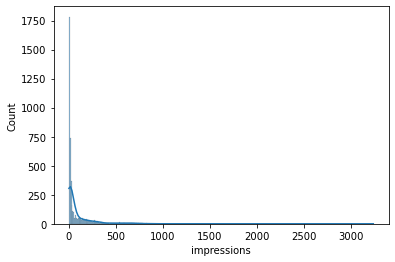

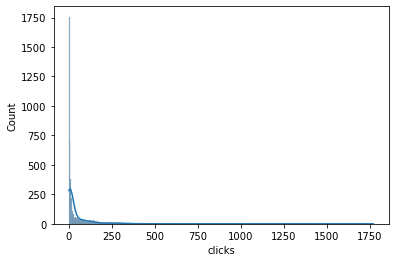

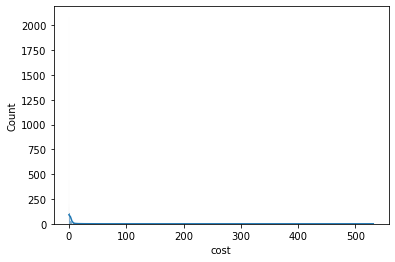

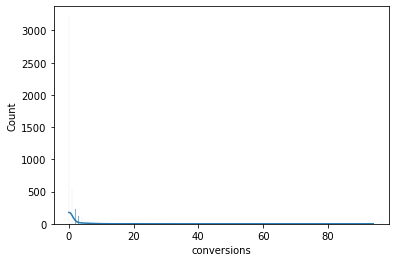

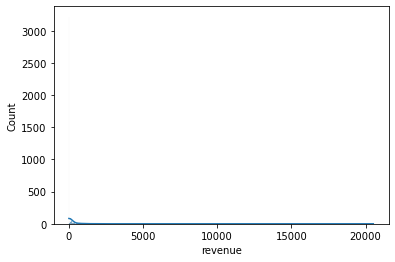

In [19]:
for col in dfe.columns:
    sns.histplot(dfe[col], kde = True)
    plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'bar'

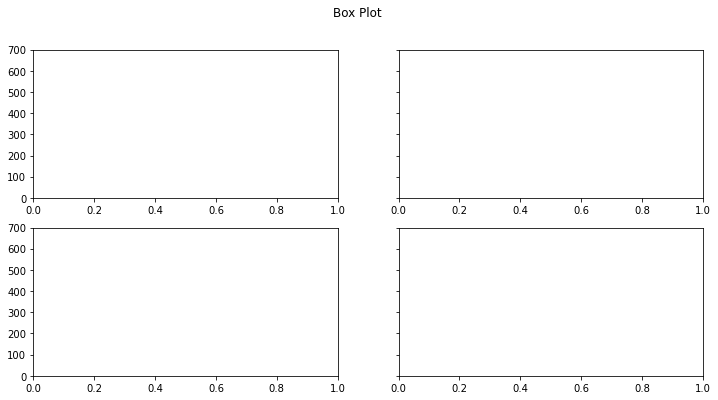

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Box Plot')
plt.ylim(0, 700)
sns.barplot(ax = axes[0], x=dfe['impressions'].index, y=dfe['impressions'].values)
axes[0].set_title(dfe['impressions'].name)


###  Observation

Dataset is very skewed , so we have to scale it and apply transformation

One more observation is that the data in Cost , Conversion and Revenue columns are very sparse

In [20]:
dfc = df1.select_dtypes(exclude= ['float64','int64'])
dfc.describe()

,date,adgroup,ad
count,4571,4571,4571
unique,212,4,70
top,30-10-2020,adgroup 3,ad 3
freq,35,1672,617


In [21]:
dfc.head()

,date,adgroup,ad
0,01-08-2020,adgroup 1,ad 1
1,01-08-2020,adgroup 2,ad 1
2,01-08-2020,adgroup 3,ad 1
3,01-08-2020,adgroup 4,ad 1
4,01-08-2020,adgroup 1,ad 2


In [22]:
dfc.nunique()

date       212
adgroup      4
ad          70
dtype: int64

In [23]:
for col in dfc.columns:
    print(dfc[col].value_counts())

30-10-2020    35
29-10-2020    34
22-12-2020    34
24-12-2020    33
25-12-2020    32
              ..
13-09-2020    10
30-09-2020    10
29-09-2020     8
28-08-2020     8
31-08-2020     8
Name: date, Length: 212, dtype: int64
adgroup 3    1672
adgroup 1    1314
adgroup 4     858
adgroup 2     727
Name: adgroup, dtype: int64
ad 3     617
ad 1     587
ad 2     512
ad 7     461
ad 32    377
        ... 
ad 36      4
ad 24      4
ad 31      4
ad 39      4
ad 51      3
Name: ad, Length: 70, dtype: int64


 #### We will be using Lebel Encoding as the categorical data in all the three columns are ordinal.

In [24]:
lbl = LabelEncoder()
cat_df = dfc.copy()
for col in dfc.columns:
    cat_df[col] = lbl.fit_transform(dfc[col])

In [25]:
cat_df.head()

,date,adgroup,ad
0,2,0,0
1,2,1,0
2,2,2,0
3,2,3,0
4,2,0,11


In [26]:
frames = [cat_df,dfe]
df_final = pd.concat(frames, axis = 1)

In [27]:
df_final.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,24,6,0.08,0,0.00
1,2,1,0,1,0,0.00,0,0.00
2,2,2,0,13,4,0.04,0,0.00
3,2,3,0,5,4,0.08,0,0.00
4,2,0,11,247,126,1.29,4,925.71


Now we will do scaling 

In [32]:
scl = QuantileTransformer()

y = df_final['revenue'] # genre variable.
X = df_final.loc[:, df_final.columns != 'revenue'] #select all columns but not the labels

cols = X.columns
np_scaled = scl.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


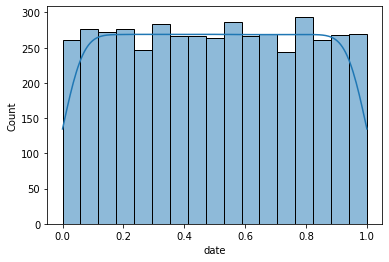

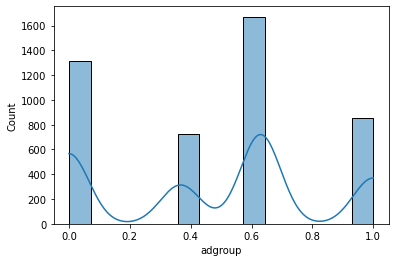

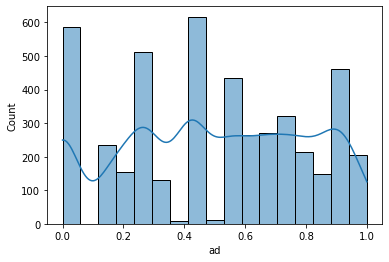

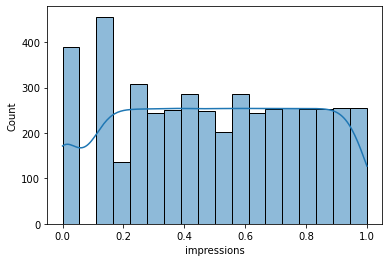

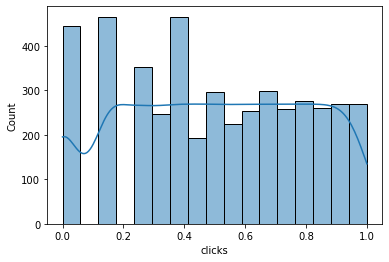

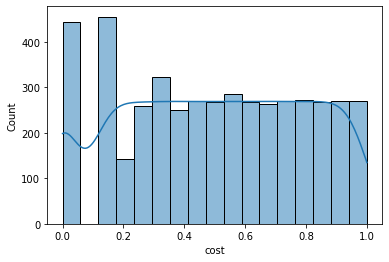

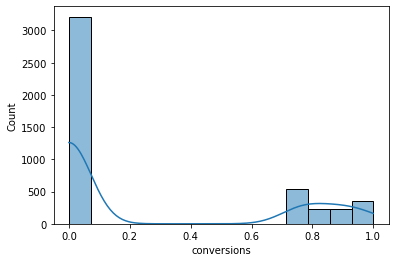

In [33]:
for col in X.columns:
    sns.histplot(X[col], kde = True)
    plt.show()

In [34]:
scaler = Normalizer(norm = 'l2')

y1 = df_final['revenue'] # genre variable.
X1 = df_final.loc[:, df_final.columns != 'revenue'] #select all columns but not the labels

cols = X1.columns
np_scaled = scaler.fit_transform(X1)
X1 = pd.DataFrame(np_scaled, columns = cols)

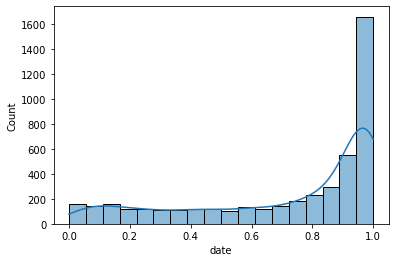

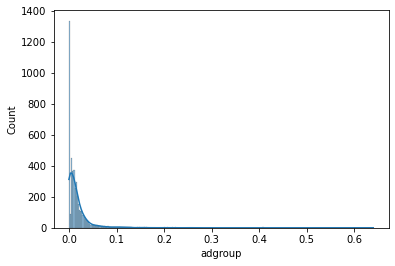

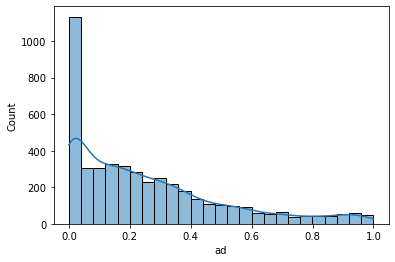

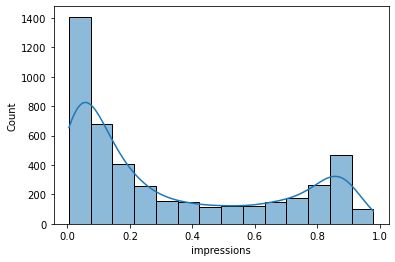

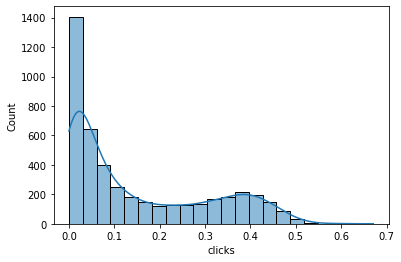

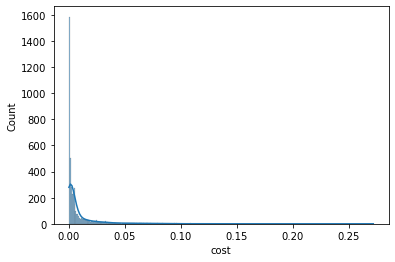

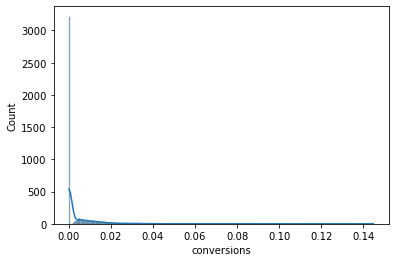

In [35]:
for col in X1.columns:
    sns.histplot(X1[col], kde = True)
    plt.show()

In [36]:
scaler = MinMaxScaler()

y2 = df_final['revenue'] # genre variable.
X2 = df_final.loc[:, df_final.columns != 'revenue'] #select all columns but not the labels

cols = X2.columns
np_scaled = scaler.fit_transform(X2)
X2 = pd.DataFrame(np_scaled, columns = cols)

for col in X2.columns:
    sns.histplot(X2[col], kde = True)
    plt.show()

As we can see Quantile transformer works better 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [38]:
rf = RandomForestRegressor(n_estimators = 1000, max_depth = 7, random_state = 0, max_features = 'sqrt')
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=1000,
                      random_state=0)

In [39]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9782868313048565
0.9238421645490784


In [170]:
r2 = r2_score(y_test, rf.predict(X_test))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,rf.predict(X_test)))))

0.9238421645490784
RMSE 5.4310216646634455


In [216]:
xg = XGBRegressor(learning_rate = 0.25, max_depth = 7, random_state = 0)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [217]:
print(xg.score(X_train.values, y_train.values))
print(xg.score(X_test.values, y_test.values))

0.9996662979761913
0.897596495993495


In [218]:
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xg.predict(X_test.values)))))

0.897596495993495
RMSE 5.579078145578117


In [225]:
xgrf = XGBRFRegressor(n_estimators = 2000 , max_depth = 7, random_state = 0)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=7,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=2000, n_jobs=8, num_parallel_tree=2000,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [226]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))

0.9884156873327687
0.9530363688377909


In [227]:
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.9530363688377909
RMSE 5.1893044287158805


In [185]:
knn = KNeighborsRegressor(n_neighbors = 7, p = 1 , leaf_size = 10)
knn.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=7, p=1)

In [186]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.7674476449892489
0.8665200572280612


In [187]:
r2 = r2_score(y_test, knn.predict(X_test))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,knn.predict(X_test)))))

0.8665200572280612
RMSE 5.711593292733493


In [139]:
dt = DecisionTreeRegressor(max_depth = 5 ,random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [140]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.981496527255756
0.897375825604939


In [173]:
r2 = r2_score(y_test, dt.predict(X_test))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,dt.predict(X_test)))))

0.897375825604939
RMSE 5.580154441595735


In [48]:
df_test = pd.read_csv('Test_Data.csv')
df_test.head()


,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [49]:
df_test.drop('campaign', axis = 1, inplace = True)
lbl = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
           df_test[col] = lbl.fit_transform(df_test[col])   
 

In [50]:
df_test.head()

,date,adgroup,ad,cost,impressions,clicks,conversions
0,0,0,0,0.58,121,49,1
1,0,2,0,0.17,22,12,0
2,0,3,0,0.05,5,3,0
3,0,1,0,0.01,2,1,0
4,0,1,2,0.01,3,1,0


In [71]:
cols = df_test.columns
df_scaled = scl.transform(df_test)
df_test = pd.DataFrame(df_scaled, columns = cols)

In [72]:
y_pred = rf.predict(df_test)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue.csv")

XG Boost

In [92]:
y_predxg = xg.predict(df_test.values)
DF = pd.DataFrame(y_predxg)
DF.to_csv("revenue_xg.csv")

In [229]:
y_predxgrf = xgrf.predict(df_test.values)
DF = pd.DataFrame(y_predxgrf)
DF.to_csv("revenue_xgrf1.csv")

In [188]:
y_predknn = knn.predict(df_test)
DF = pd.DataFrame(y_predknn)
DF.to_csv("revenue_knn_optimized.csv")

In [142]:
y_preddt = dt.predict(df_test)
DF = pd.DataFrame(y_preddt)
DF.to_csv("revenue_dt.csv")

In [93]:
y_wT = df_final['revenue'] # genre variable.
X_wT = df_final.loc[:, df_final.columns != 'revenue'] #select all columns but not the labels

In [94]:
X_wT.head()

,date,adgroup,ad,impressions,clicks,cost,conversions
0,2,0,0,24,6,0.08,0
1,2,1,0,1,0,0.00,0
2,2,2,0,13,4,0.04,0
3,2,3,0,5,4,0.08,0
4,2,0,11,247,126,1.29,4


In [96]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_wT, y_wT,test_size=0.2, random_state=0)

In [97]:
xg = XGBRegressor()
xg.fit(X_train1.values, y_train1.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
print(xg.score(X_train1.values, y_train1.values))
print(xg.score(X_test1.values, y_test1.values))

0.9994958971117183
0.8908992364758601


In [25]:
df_Test = pd.read_csv('Test_Data.csv')
df_Test.drop('campaign', axis = 1, inplace = True)
lbl = LabelEncoder()
for col in df_Test.columns:
    if df_Test[col].dtypes == 'object':
           df_Test[col] = lbl.fit_transform(df_Test[col])  
            
df_Test.head()

,date,adgroup,ad,cost,impressions,clicks,conversions
0,0,0,0,0.58,121,49,1
1,0,2,0,0.17,22,12,0
2,0,3,0,0.05,5,3,0
3,0,1,0,0.01,2,1,0
4,0,1,2,0.01,3,1,0


In [100]:
y_predxg_wT = xg.predict(df_Test.values)
DF = pd.DataFrame(y_predxg_wT)
DF.to_csv("revenue_xg_withoutTransform.csv")

### We can try creating new features for improving the model

CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)

CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)

CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)

ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent

In [150]:
ad_df = pd.read_csv('Train_Data.csv')
ad_df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [151]:
ad_df['CTR'] = ad_df['clicks']/ad_df['impressions']
ad_df['CPC'] = ad_df['cost']/ad_df['clicks']
ad_df['CPA'] = ad_df['cost']/ad_df['conversions']

In [152]:
ad_df.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,inf
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,inf
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,inf
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225


In [153]:
ad_df.isnull().sum()

date             0
campaign         0
adgroup          0
ad               0
impressions      0
clicks           0
cost             0
conversions      0
revenue          0
CTR              0
CPC            444
CPA            444
dtype: int64

<AxesSubplot:>

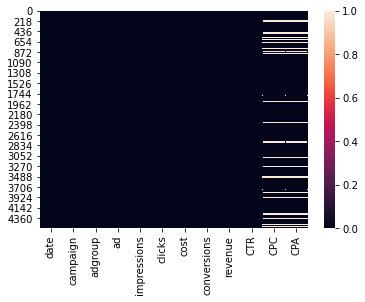

In [154]:
sns.heatmap(ad_df.isnull())

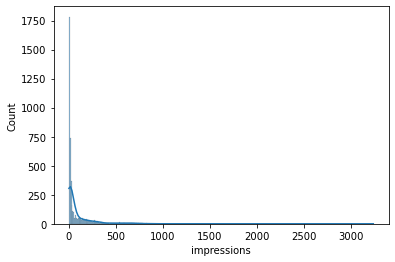

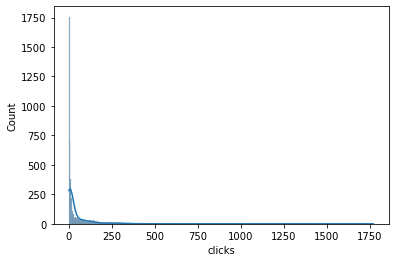

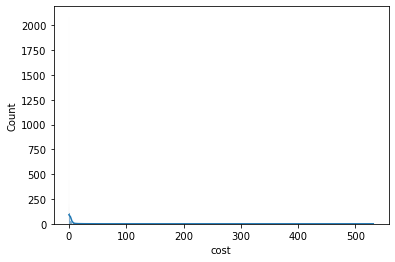

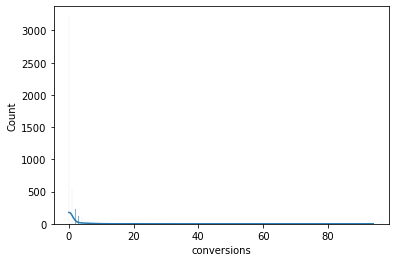

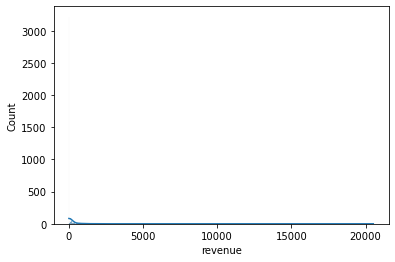

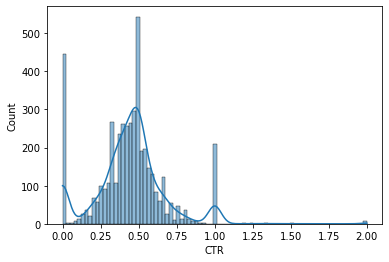

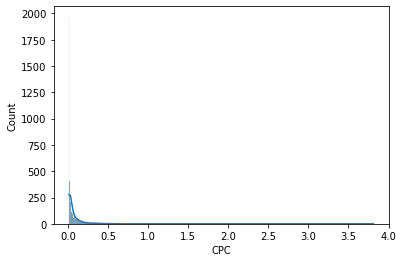

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


ValueError: autodetected range of [0.01, inf] is not finite

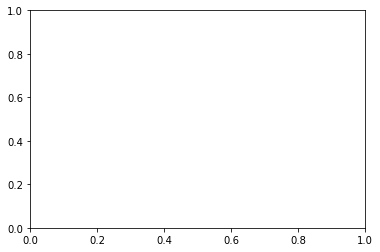

In [156]:
for col in ad_df.columns:
    if ad_df[col].dtypes != 'object':
        sns.histplot(ad_df[col], kde = True)
        plt.show()

### Using One hot encoding

In [209]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = dfc.copy()
ohe_df.nunique()

date       212
adgroup      4
ad          70
dtype: int64

### Applying Transforms after Split

In [13]:
y2 = df_final['revenue'] # genre variable.
X2 = df_final.loc[:, df_final.columns != 'revenue'] #select all columns but not the labels
X_train, X_test, y_train, y_test = train_test_split(X2, y2,test_size=0.2 , random_state=0)

sts = QuantileTransformer(n_quantiles = 900)
cols1 = X_train.columns
np_scaled1 = sts.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled1, columns = cols1)

cols2 = X_test.columns
np_scaled2 = sts.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled2, columns = cols2)


In [94]:
knn1 = KNeighborsRegressor(n_neighbors = 5, p = 1 , leaf_size = 10)
knn1.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=10, p=1)

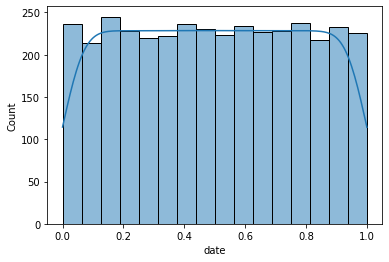

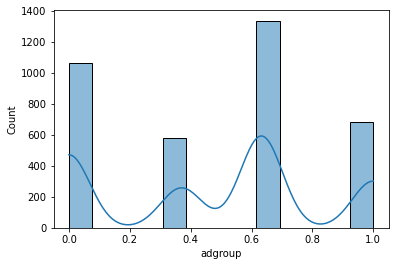

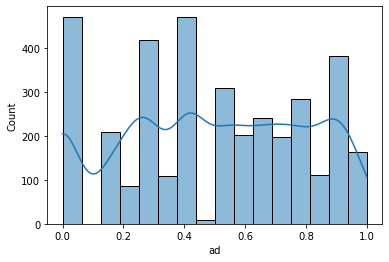

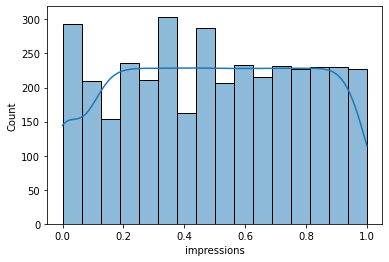

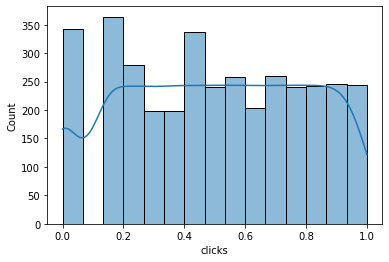

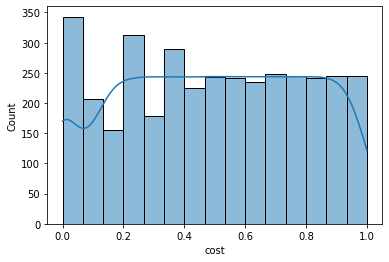

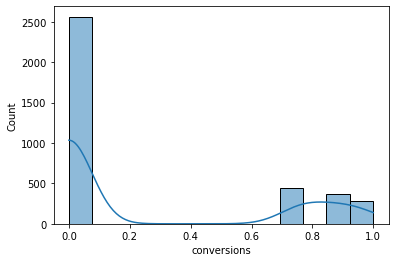

In [59]:
for col in X_train.columns:
    sns.histplot(X_train[col], kde = True)
    plt.show()

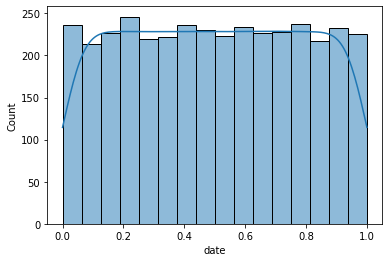

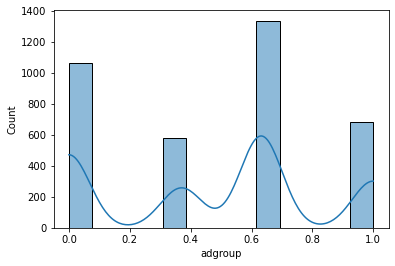

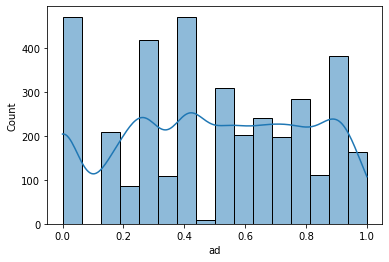

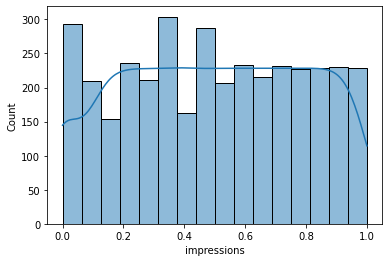

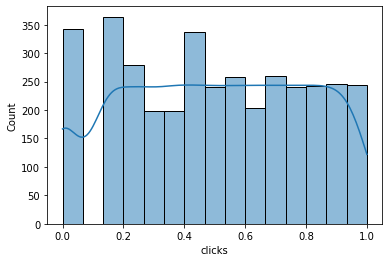

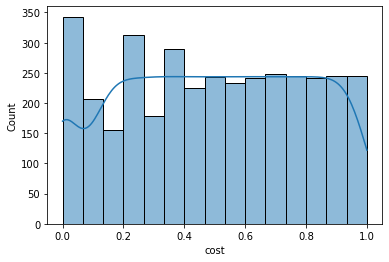

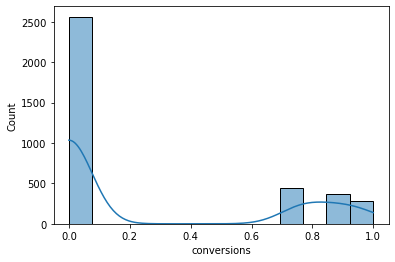

In [236]:
for col in X_test.columns:
    sns.histplot(X_test[col], kde = True)
    plt.show()

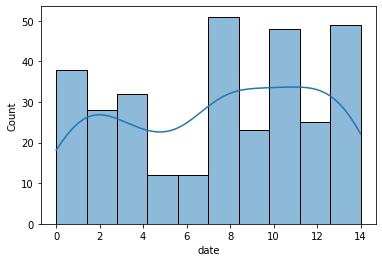

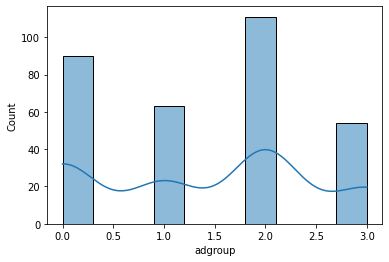

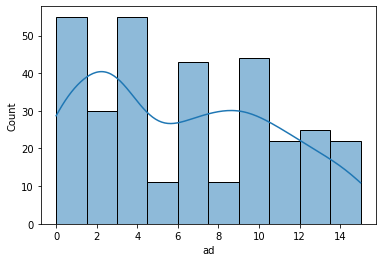

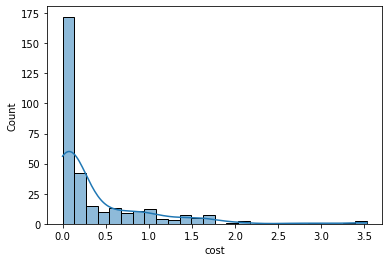

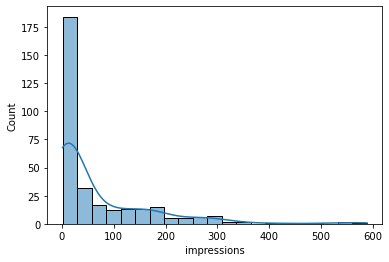

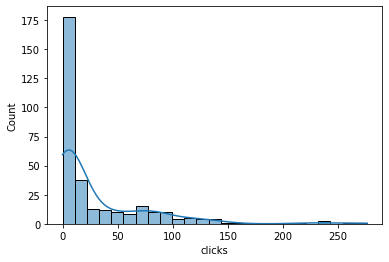

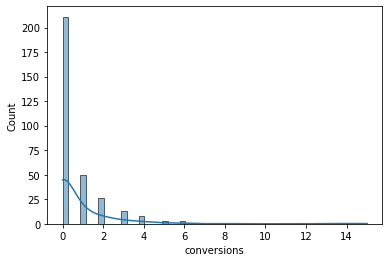

In [21]:
for col in df_Test.columns:
    sns.histplot(df_Test[col], kde = True)
    plt.show()

In [95]:
r2 = r2_score(y_test, knn1.predict(X_test))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,knn1.predict(X_test)))))

0.8609973815042747
RMSE 5.731864065687376


In [27]:
cols = df_Test.columns
df_scale = sts.transform(df_Test)
df_Test = pd.DataFrame(df_scale , columns = cols)

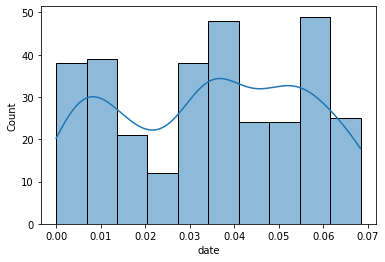

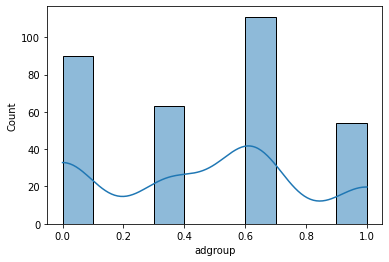

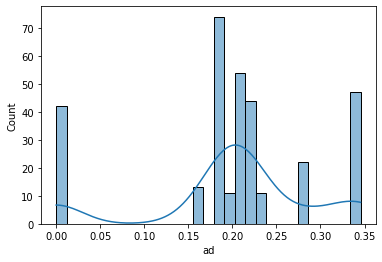

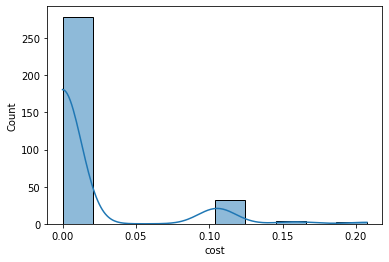

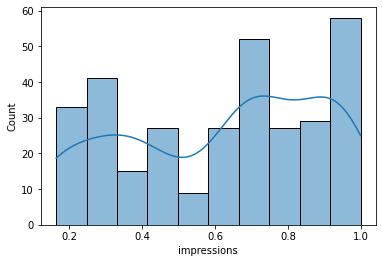

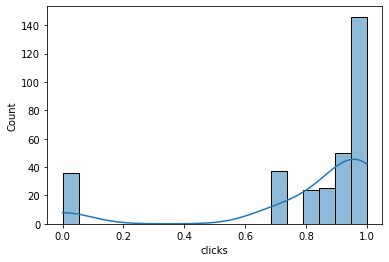

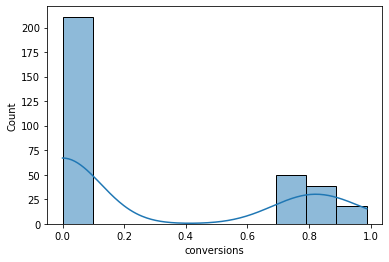

In [30]:
for col in df_Test.columns:
    sns.histplot(df_Test[col], kde = True)
    plt.show()

In [85]:
y_pred = knn1.predict(df_Test)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_knn2.csv")

In [100]:
xg = XGBRegressor(n_estimators= 200,  learning_rate = 0.7, max_depth = 4, min_child_weight = 6)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.7, max_delta_step=0, max_depth=4,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,xg.predict(X_test.values)))))

0.41962061225431313
RMSE 6.446458683412488


In [35]:
y_pred = xgrf.predict(df_Test.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_xgrf1.csv")

In [72]:
dt = DecisionTreeRegressor(max_depth = 4 ,random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [73]:
r2 = r2_score(y_test, dt.predict(X_test))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,dt.predict(X_test)))))

0.39759384194737935
RMSE 6.465083629643549


### One Hot encoding

In [10]:
df_final.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2,0,0,24,6,0.08,0,0.00
1,2,1,0,1,0,0.00,0,0.00
2,2,2,0,13,4,0.04,0,0.00
3,2,3,0,5,4,0.08,0,0.00
4,2,0,11,247,126,1.29,4,925.71


In [11]:
df_final1 = df_final.drop('adgroup', axis = 1)

In [12]:
ad_dummies = pd.get_dummies(dfc.adgroup)
df_final1 = pd.concat([df_final1, ad_dummies], axis=1)

In [13]:
df_final1.head()

,date,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,2,0,24,6,0.08,0,0.00,1,0,0,0
1,2,0,1,0,0.00,0,0.00,0,1,0,0
2,2,0,13,4,0.04,0,0.00,0,0,1,0
3,2,0,5,4,0.08,0,0.00,0,0,0,1
4,2,11,247,126,1.29,4,925.71,1,0,0,0


In [22]:
Test_df = pd.read_csv("Test_Data.csv")
Test_df.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [23]:
Test_df.drop('campaign', axis = 1, inplace = True)

In [24]:
lbl = LabelEncoder()
for col in Test_df.columns:
    if Test_df[col].dtypes == 'object':
        if col != 'adgroup':
            Test_df[col] = lbl.fit_transform(Test_df[col])           
Test_df.head()

,date,adgroup,ad,cost,impressions,clicks,conversions
0,0,adgroup 1,0,0.58,121,49,1
1,0,adgroup 3,0,0.17,22,12,0
2,0,adgroup 4,0,0.05,5,3,0
3,0,adgroup 2,0,0.01,2,1,0
4,0,adgroup 2,2,0.01,3,1,0


In [25]:
ad_dummies = pd.get_dummies(Test_df['adgroup'])
Test_df = pd.concat([Test_df, ad_dummies], axis=1)

In [26]:
Test_df.drop('adgroup', axis = 1, inplace = True)

In [27]:
Test_df.head()

,date,ad,cost,impressions,clicks,conversions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,0,0,0.58,121,49,1,1,0,0,0
1,0,0,0.17,22,12,0,0,0,1,0
2,0,0,0.05,5,3,0,0,0,0,1
3,0,0,0.01,2,1,0,0,1,0,0
4,0,2,0.01,3,1,0,0,1,0,0


Scaling the data

In [20]:
scl = QuantileTransformer()

y = df_final1['revenue'] # genre variable.
X = df_final1.drop('revenue', axis = 1) #select all columns but not the labels

cols = X.columns
np_scaled = scl.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

cols1 = Test_df.columns
np_scaled1 = scl.transform(Test_df)
Test_df = pd.DataFrame(np_scaled1, columns = cols1)

In [21]:
Test_df.head()

,date,ad,cost,impressions,clicks,conversions,adgroup 1,adgroup 2,adgroup 3,adgroup 4
0,0.0,0.000000,0.0,0.889890,0.992693,0.762262,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.694194,0.953944,0.000000,0.0,0.0,1.0,0.0
2,0.0,0.000000,0.0,0.407908,0.858876,0.000000,0.0,0.0,0.0,1.0
3,0.0,0.000000,0.0,0.236737,0.699700,0.000000,0.0,1.0,0.0,0.0
4,0.0,0.181181,0.0,0.302302,0.699700,0.000000,0.0,1.0,0.0,0.0


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=0)

In [173]:
knn2 = KNeighborsRegressor(n_neighbors =  , p = 1 , leaf_size = 10)
knn2.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=7, p=1)

In [174]:
print(knn2.score(X_train, y_train))
print(knn2.score(X_test, y_test))
r2 = r2_score(y_test, knn2.predict(X_test))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,knn2.predict(X_test)))))

0.7674200713674232
0.8664523509407062
0.8664523509407062
RMSE 5.711846848137045


In [176]:
y_pred = knn2.predict(Test_df)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_knn3.csv")

In [232]:
xg = XGBRegressor(n_estimators= 200,  learning_rate = 0.009 , max_depth = 5, min_child_weight = 5)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.009, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [233]:
print(xg.score(X_train.values, y_train.values))
print(xg.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xg.predict(X_test.values)))))

0.9361897231592761
0.8294816389849173
0.8294816389849173
RMSE 5.834039170243138


In [231]:
y_pred = xg.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XG_6.csv")

In [263]:
xgrf = XGBRFRegressor(n_estimators= 400,  learning_rate = 0.85 , max_depth = 4, min_child_weight = 6)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.85, max_delta_step=0,
               max_depth=4, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=8,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [264]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.932107278998311
0.8770887445305375
0.8770887445305375
RMSE 5.670348977520165


In [265]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_3.csv")

In [275]:
xgrf = XGBRFRegressor(n_estimators= 400,  learning_rate = 0.85 , max_depth = 5, min_child_weight = 6)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.85, max_delta_step=0,
               max_depth=5, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=8,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [281]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.9345299288523166
0.8833317091924309
0.8833317091924309
RMSE 5.644285073624469


In [277]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_4.csv")

## Taking the whole Training data for fit

In [288]:
xgrf = XGBRFRegressor(n_estimators= 400,  learning_rate = 0.8 , max_depth = 5, min_child_weight = 6)
train_x = X.values
train_y = y.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.85, max_delta_step=0,
               max_depth=5, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=8,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
print(xgrf.score(X_train.values, y_train.values))

0.9149283260134683


In [287]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_unique1.csv")

In [289]:
xgrf = XGBRFRegressor(n_estimators= 400,  learning_rate = 0.75 , max_depth = 5, min_child_weight = 6)
train_x = X.values
train_y = y.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.75, max_delta_step=0,
               max_depth=5, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=8,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [290]:
print(xgrf.score(X_train.values, y_train.values))

0.8918130485200906


In [291]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_unique2.csv")

### Feature engineering 

### We can try creating new features for improving the model

CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)

CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)

CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)

ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent

In [32]:
df_final1['CTR'] = df_final1['clicks']/df_final1['impressions']
df_final1['CPC'] = df_final1['cost']/df_final1['clicks']
df_final1['CPA'] = df_final1['cost']/df_final1['conversions']

In [33]:
df_final1.head()

,date,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4,CTR,CPC,CPA
0,2,0,24,6,0.08,0,0.00,1,0,0,0,0.250000,0.013333,inf
1,2,0,1,0,0.00,0,0.00,0,1,0,0,0.000000,NaN,NaN
2,2,0,13,4,0.04,0,0.00,0,0,1,0,0.307692,0.010000,inf
3,2,0,5,4,0.08,0,0.00,0,0,0,1,0.800000,0.020000,inf
4,2,11,247,126,1.29,4,925.71,1,0,0,0,0.510121,0.010238,0.3225


In [30]:
Test_df['CTR'] = Test_df['clicks']/Test_df['impressions']
Test_df['CPC'] = Test_df['cost']/Test_df['clicks']
Test_df['CPA'] = Test_df['cost']/Test_df['conversions']

In [31]:
Test_df.head()

,date,ad,cost,impressions,clicks,conversions,adgroup 1,adgroup 2,adgroup 3,adgroup 4,CTR,CPC,CPA
0,0,0,0.58,121,49,1,1,0,0,0,0.404959,0.011837,0.58
1,0,0,0.17,22,12,0,0,0,1,0,0.545455,0.014167,inf
2,0,0,0.05,5,3,0,0,0,0,1,0.600000,0.016667,inf
3,0,0,0.01,2,1,0,0,1,0,0,0.500000,0.010000,inf
4,0,2,0.01,3,1,0,0,1,0,0,0.333333,0.010000,inf


<AxesSubplot:>

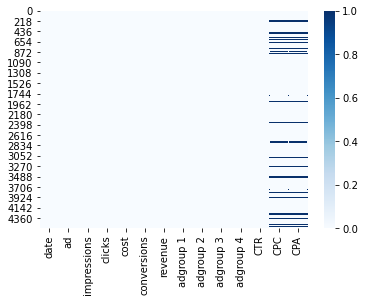

In [37]:
sns.heatmap(df_final1.isnull(), cmap = 'Blues')

<AxesSubplot:>

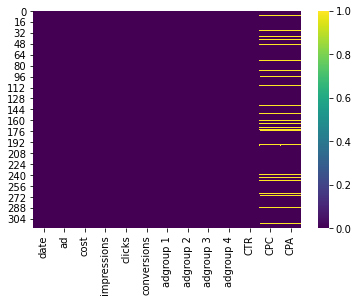

In [38]:
sns.heatmap(Test_df.isnull(), cmap = 'viridis')

In [41]:
df_final1 = df_final1.replace([np.inf, -np.inf], np.nan)
Test_df = Test_df.replace([np.inf, -np.inf], np.nan)

In [42]:
df_final1.head()

,date,ad,impressions,clicks,cost,conversions,revenue,adgroup 1,adgroup 2,adgroup 3,adgroup 4,CTR,CPC,CPA
0,2,0,24,6,0.08,0,0.00,1,0,0,0,0.250000,0.013333,NaN
1,2,0,1,0,0.00,0,0.00,0,1,0,0,0.000000,NaN,NaN
2,2,0,13,4,0.04,0,0.00,0,0,1,0,0.307692,0.010000,NaN
3,2,0,5,4,0.08,0,0.00,0,0,0,1,0.800000,0.020000,NaN
4,2,11,247,126,1.29,4,925.71,1,0,0,0,0.510121,0.010238,0.3225


<AxesSubplot:>

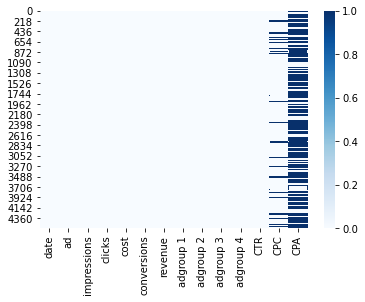

In [43]:
sns.heatmap(df_final1.isnull(), cmap = 'Blues')

<AxesSubplot:>

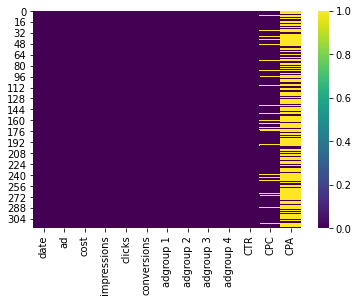

In [44]:
sns.heatmap(Test_df.isnull(), cmap = 'viridis')

In [45]:
df_final1.drop('CPA', axis = 1, inplace = True)
Test_df.drop('CPA', axis = 1, inplace = True)

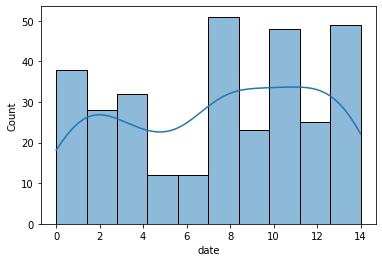

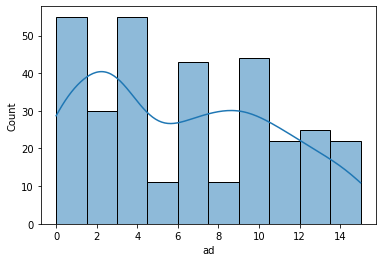

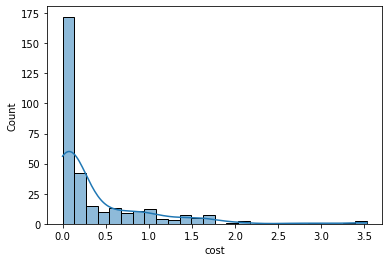

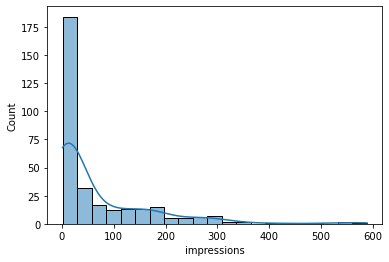

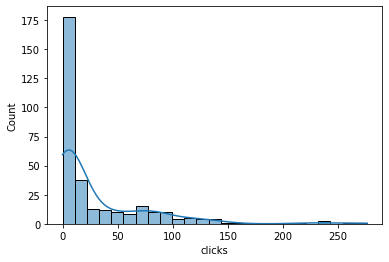

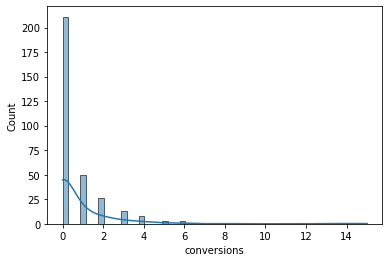

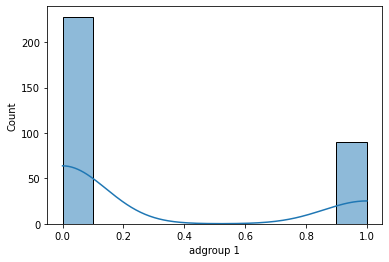

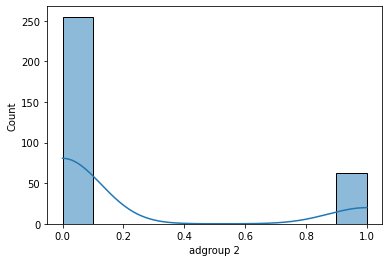

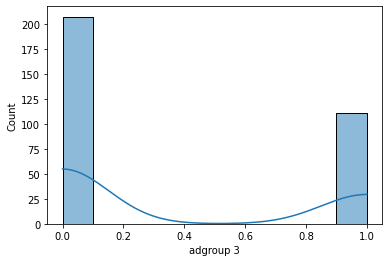

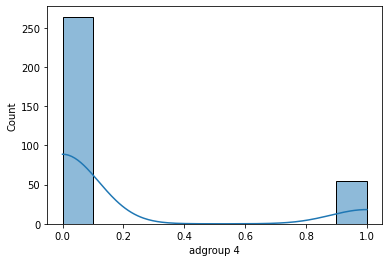

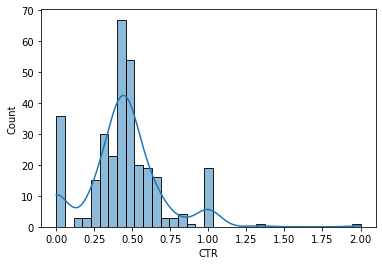

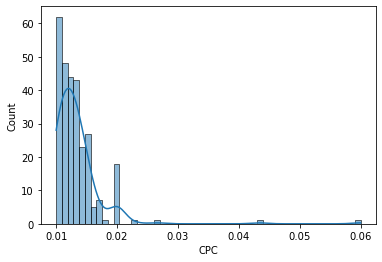

In [49]:
for col in Test_df.columns:
    sns.histplot(Test_df[col], kde = True)
    plt.show()

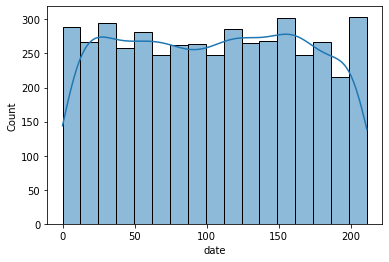

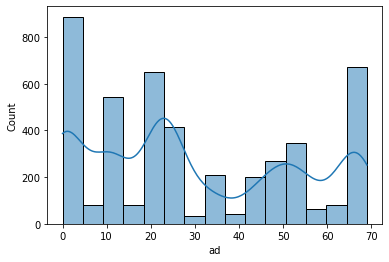

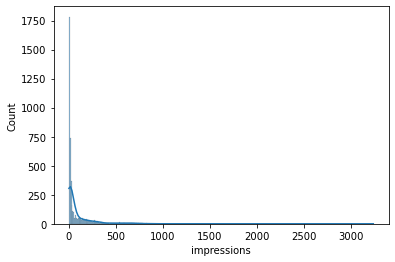

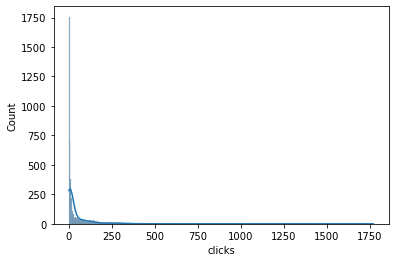

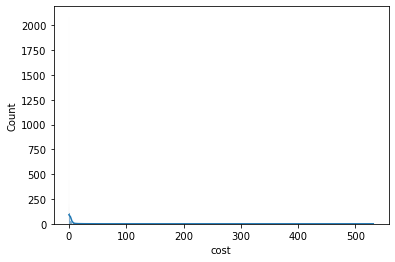

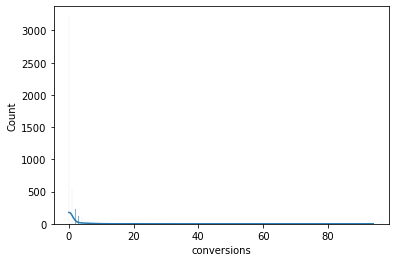

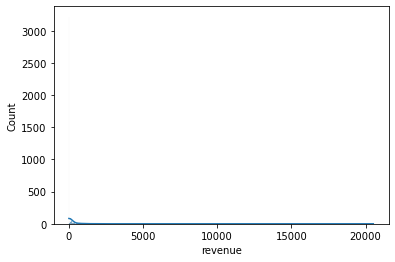

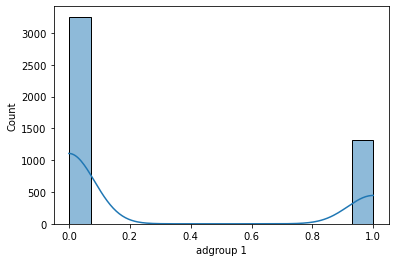

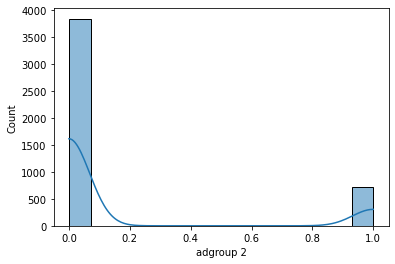

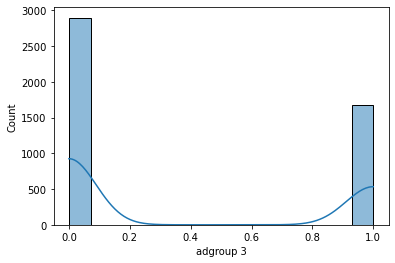

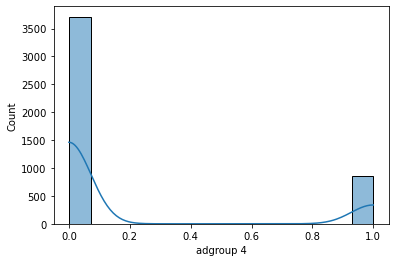

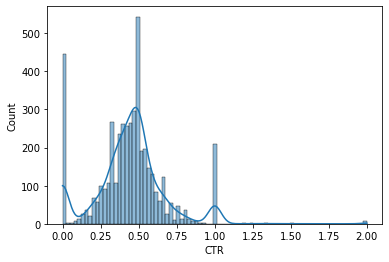

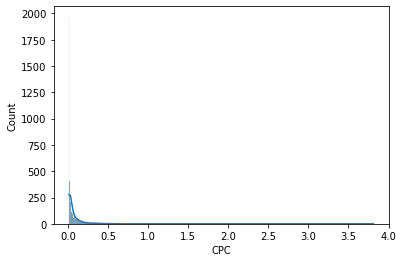

In [50]:
for col in df_final1.columns:
    sns.histplot(df_final1[col], kde = True)
    plt.show()

In [46]:
from sklearn.impute import SimpleImputer

In [60]:
y = df_final1['revenue']
X = df_final1.drop('revenue', axis = 1)

cols = X.columns
impute = SimpleImputer(strategy = 'mean')

impt1 = impute.fit_transform(X)
X = pd.DataFrame(impt1, columns = cols)

cols1 = Test_df.columns
impt2 = impute.transform(Test_df)
Test_df = pd.DataFrame(impt2, columns = cols1)

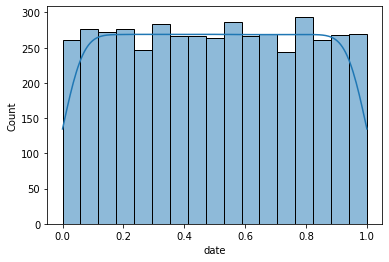

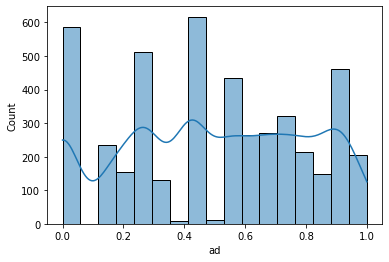

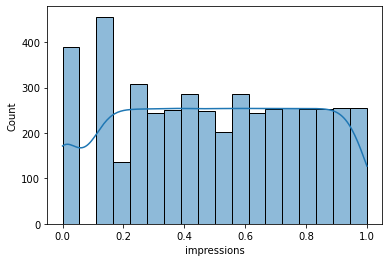

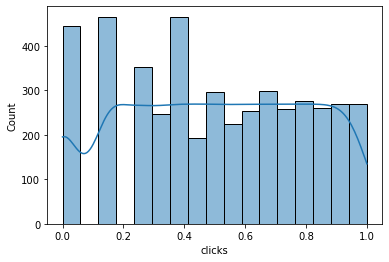

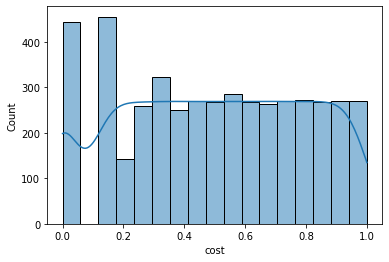

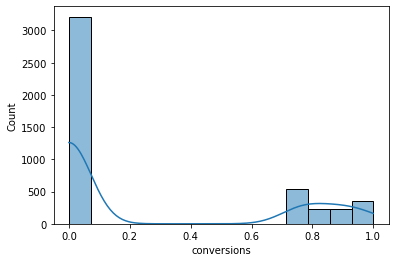

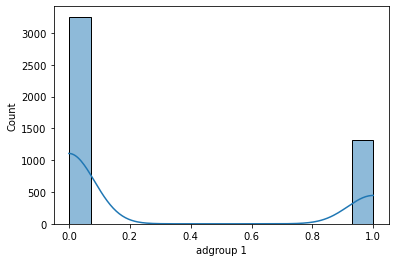

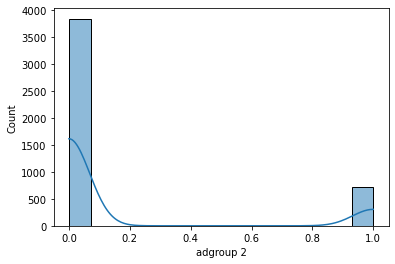

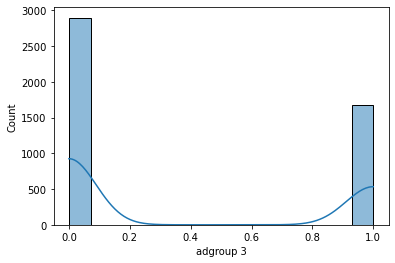

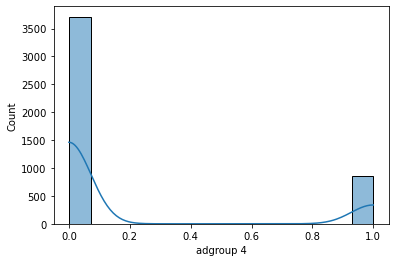

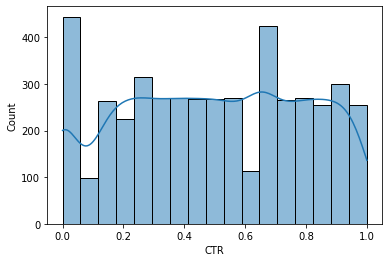

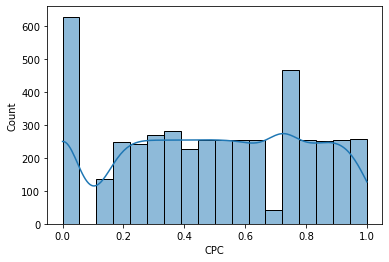

In [481]:
for col in X.columns:
    sns.histplot(X[col], kde = True)
    plt.show()

<AxesSubplot:xlabel='CPC', ylabel='Count'>

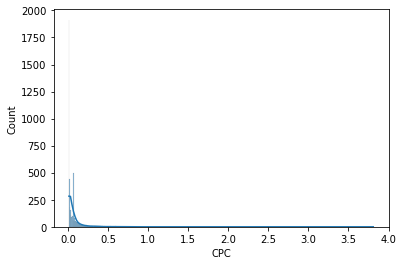

In [63]:
sns.histplot(X['CPC'], kde = True)

In [64]:
scl = QuantileTransformer()

cols = X.columns
np_scaled = scl.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

cols1 = Test_df.columns
np_scaled1 = scl.transform(Test_df)
Test_df = pd.DataFrame(np_scaled1, columns = cols1)

### Model Evaluation

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=0)

In [103]:
xg = XGBRegressor(n_estimators= 200,  learning_rate = 0.009, max_depth = 4, min_child_weight = 6)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.009, max_delta_step=0, max_depth=4,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
print(xg.score(X_train.values, y_train.values))
print(xg.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xg.predict(X_test.values)))))

0.9355623222337258
0.8355073487347988
0.8355073487347988
RMSE 5.816050628185216


In [102]:
y_pred = xg.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XG_26thJune.csv")

In [129]:
xg = XGBRegressor(n_estimators= 200,  learning_rate = 0.01, max_depth = 5, min_child_weight = 6, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=10, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
print(xg.score(X_train.values, y_train.values))
print(xg.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xg.predict(X_test.values)))))

0.9510895749434217
0.8606366840313168
0.8606366840313168
RMSE 5.7331598337041205


In [131]:
y_pred = xg.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XG_26thJune3.csv")

In [139]:
xgrf = XGBRFRegressor(n_estimators= 300,  learning_rate = 0.8 , max_depth = 5, min_child_weight = 6)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.8, max_delta_step=0,
               max_depth=5, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=300, n_jobs=8,
               num_parallel_tree=300, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.9147211896115115
0.8612141126151306
0.8612141126151306
RMSE 5.731083863662297


In [141]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune3.csv")

In [148]:
xgrf = XGBRFRegressor(n_estimators= 400 , learning_rate = 0.85 , max_depth = 5, min_child_weight = 6)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.85, max_delta_step=0,
               max_depth=5, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=8,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.9342517619554457
0.8883281656814646
0.8883281656814646
RMSE 5.622399939944181


In [150]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune2.csv")

In [222]:
rf = RandomForestRegressor(n_estimators = 400, max_depth = 8 , min_samples_split = 6 , random_state = 0, max_leaf_nodes = 9)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_leaf_nodes=9, min_samples_split=6,
                      n_estimators=400, random_state=0)

In [220]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))
r2 = r2_score(y_test, rf.predict(X_test))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,rf.predict(X_test)))))

0.9605716234067978
0.9107205376643974
0.9107205376643974
RMSE 5.510503418355473


In [221]:
y_pred = rf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_RF_26thJune3.csv")

In [239]:
xgrf = XGBRFRegressor(n_estimators= 300,  learning_rate = 0.75 , max_depth = 10, min_child_weight = 6)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.75, max_delta_step=0,
               max_depth=10, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=300, n_jobs=8,
               num_parallel_tree=300, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [240]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8965605838283729
0.8381417107821638
0.8381417107821638
RMSE 5.807978277408286


## Leaderboard score -- 150 

In [241]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune4.csv")

In [272]:
xgrf = XGBRFRegressor(n_estimators = 300,  learning_rate = 0.76 , max_depth = 10, min_child_weight = 6, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.76, max_delta_step=0,
               max_depth=10, min_child_weight=6, missing=nan,
               monotone_constraints='()', n_estimators=300, n_jobs=10,
               num_parallel_tree=300, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [273]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.9017629118965672
0.8439513854068686
0.8439513854068686
RMSE 5.789701475516186


## Leaderboard score  = 149.98

In [274]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__.csv")

In [282]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.78 , max_depth = 10, min_child_weight = 7, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.78, max_delta_step=0,
               max_depth=10, min_child_weight=7, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [283]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.907730582857363
0.8582046417381342
0.8582046417381342
RMSE 5.741810119741744


## Leaderboard score = 149.59

In [285]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__1.csv")

In [288]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.78 , max_depth = 10, min_child_weight = 10, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.78, max_delta_step=0,
               max_depth=10, min_child_weight=10, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [289]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8671489536161839
0.8758883896284596
0.8758883896284596
RMSE 5.675208302368434


## Leaderboard score = 148.0043

In [290]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__2.csv")

In [309]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.8 , max_depth = 9, min_child_weight = 9, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.8, max_delta_step=0,
               max_depth=9, min_child_weight=9, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [310]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.895669716242528
0.8774022184854229
0.8774022184854229
RMSE 5.66907214417387


## Leaderboard score = 147.4364

In [311]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune_optimized.csv")

In [343]:
xg = XGBRegressor(n_estimators = 400,  learning_rate = 0.005 , max_depth = 5, min_child_weight = 8)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [344]:
print(xg.score(X_train.values, y_train.values))
print(xg.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xg.predict(X_test.values)))))

0.9476806112296852
0.8365444514906781
0.8365444514906781
RMSE 5.812888219567375


## Leaderboard score  = 149.3097

In [345]:
y_pred = xg.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XG_26thJune_optimized.csv")

In [510]:
xg = XGBRegressor(n_estimators = 300,  learning_rate = 0.02 , max_depth = 6, min_child_weight = 10)
train_x = X_train.values
train_y = y_train.values
xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=6,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [511]:
print(xg.score(X_train.values, y_train.values))
print(xg.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xg.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xg.predict(X_test.values)))))

0.9793958565996279
0.9205852370021064
0.9205852370021064
RMSE 5.451959821628017


In [507]:
y_pred = xg.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XG_26thJune__.csv")

### Trying out Neural Networks

In [477]:
from sklearn.neural_network import MLPRegressor

In [480]:
mlp = MLPRegressor(activation = 'logistic',learning_rate = 'adaptive', random_state= 0, max_iter = 1000)
mlp.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', learning_rate='adaptive', max_iter=1000,
             random_state=0)

In [529]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.8 , max_depth = 8, min_child_weight = 10, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.8, max_delta_step=0,
               max_depth=8, min_child_weight=10, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [530]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8753640050055179
0.8854631025974059
0.8854631025974059
RMSE 5.635066189731941


## Leaderboard score = 148.3694

In [531]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__.csv")

In [546]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.87 , max_depth = 8, min_child_weight = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.87, max_delta_step=0,
               max_depth=8, min_child_weight=10, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=8,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [547]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.9006369426190224
0.9130575542225753
0.9130575542225753
RMSE 5.497240858636565


In [548]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__1.csv")

In [575]:
dt = DecisionTreeRegressor(max_depth = 6 , random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [576]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
r2 = r2_score(y_test, dt.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,dt.predict(X_test)))))

0.985730329353966
0.821619235572266
0.821619235572266
RMSE 5.856577875970439


In [581]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.77 , max_depth = 9, min_child_weight = 9, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.77, max_delta_step=0,
               max_depth=9, min_child_weight=9, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [582]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8818129814709502
0.8621347027460347
0.8621347027460347
RMSE 5.7277562309610515


### Leaderboard score = 147.005

In [583]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__2.csv")

In [595]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.85 , max_depth = 10, min_child_weight = 10, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.85, max_delta_step=0,
               max_depth=10, min_child_weight=10, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [596]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8949848978365885
0.9060299143227925
0.9060299143227925
RMSE 5.536105927233975


In [612]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__3.csv")

## Feature Selection

In [661]:
xgrf = XGBRFRegressor(n_estimators = 400,  learning_rate = 0.75 , max_depth = 9, min_child_weight = 9, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.75, max_delta_step=0,
               max_depth=9, min_child_weight=9, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 0, 'Xgrfboost Feature Importance')

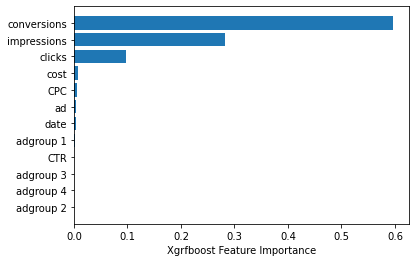

In [662]:
sorted_idx = xgrf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgrf.feature_importances_[sorted_idx])
plt.xlabel("Xgrfboost Feature Importance")

In [663]:
feature_wt = xgrf.feature_importances_

In [664]:
feature_val = pd.DataFrame({'features':X.columns, 'weights':feature_wt})
feature_val.sort_values(by='weights', ascending=False, inplace=True)
feature_val

,features,weights
5,conversions,0.596114
2,impressions,0.282454
3,clicks,0.097673
4,cost,0.007857
11,CPC,0.005739
1,ad,0.004084
0,date,0.003159
6,adgroup 1,0.001138
10,CTR,0.000984
8,adgroup 3,0.000491


In [665]:
less_weight_cols= feature_val[abs(feature_val.weights)<0.004].features.to_list()
less_weight_cols

['date', 'adgroup 1', 'CTR', 'adgroup 3', 'adgroup 4', 'adgroup 2']

In [666]:
X_train_ed = X_train.drop(columns=less_weight_cols)

X_test_ed =  X_test.drop(columns=less_weight_cols)

Test_df_ed = Test_df.drop(columns = less_weight_cols)

In [667]:
train_x = X_train_ed.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.75, max_delta_step=0,
               max_depth=9, min_child_weight=9, missing=nan,
               monotone_constraints='()', n_estimators=400, n_jobs=10,
               num_parallel_tree=400, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [668]:
print(xgrf.score(X_train_ed.values, y_train.values))
print(xgrf.score(X_test_ed.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test_ed.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test_ed.values)))))

0.8676408214469349
0.855950794091956
0.855950794091956
RMSE 5.749695154612363


### Leaderboard score  = 149.4426

In [660]:
y_pred = xgrf.predict(Test_df_ed.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF_26thJune__5.csv")

In [676]:
xgrf = XGBRFRegressor(n_estimators = 500,  learning_rate = 0.78 , max_depth = 9, min_child_weight = 9, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.78, max_delta_step=0,
               max_depth=9, min_child_weight=9, missing=nan,
               monotone_constraints='()', n_estimators=500, n_jobs=10,
               num_parallel_tree=500, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [677]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8869766025736642
0.8665762595273264
0.8665762595273264
RMSE 5.711382721266616


### Leaderboard score = 146.68

In [678]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF26thJune.csv")

In [684]:
xgrf = XGBRFRegressor(n_estimators = 500,  learning_rate = 0.8 , max_depth = 9, min_child_weight = 9, n_jobs = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.8, max_delta_step=0,
               max_depth=9, min_child_weight=9, missing=nan,
               monotone_constraints='()', n_estimators=500, n_jobs=10,
               num_parallel_tree=500, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [685]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8960330560128856
0.8766299345794416
0.8766299345794416
RMSE 5.672211930342647


### Leaderboard score = 147.018

In [686]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF26thJune1.csv")

In [712]:
xgrf = XGBRFRegressor(n_estimators = 500,  learning_rate = 0.76 , max_depth = 10, min_child_weight = 10)
train_x = X_train.values
train_y = y_train.values
xgrf.fit(train_x,train_y)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.76, max_delta_step=0,
               max_depth=10, min_child_weight=10, missing=nan,
               monotone_constraints='()', n_estimators=500, n_jobs=8,
               num_parallel_tree=500, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [713]:
print(xgrf.score(X_train.values, y_train.values))
print(xgrf.score(X_test.values, y_test.values))
r2 = r2_score(y_test.values, xgrf.predict(X_test.values))
print(r2)
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test.values,xgrf.predict(X_test.values)))))

0.8585693212643515
0.8651602815508553
0.8651602815508553
RMSE 5.716661081324915


In [1]:
y_pred = xgrf.predict(Test_df.values)
DF = pd.DataFrame(y_pred)
DF.to_csv("revenue_XGRF26thJune2.csv")

NameError: name 'xgrf' is not defined